In [213]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch

/var/folders/4m/7mpb_q5j65zdcnwbryv2_f8h0000gn/T/ipykernel_6197/4156810852.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


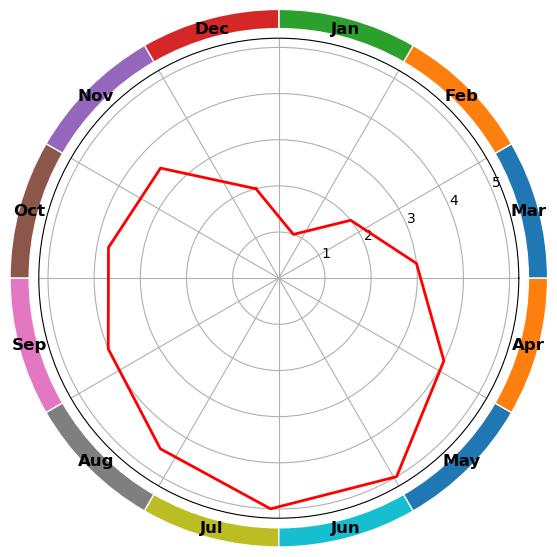

In [214]:
# Number of data points
N = 12

# Generate N angles, equally spaced between 0 and 2*pi
# endpoint=False avoids repeating the first point at 2π
angles = np.linspace(2*np.pi, 0, N, endpoint=True)

# If you want to start plotting from the top (i.e., 12 o'clock),
# shift the angles by pi/2
angles += np.pi/2 + 0.25


# Example radial data (some arbitrary values for demonstration)
radii = [2, 1, 2, 3, 4, 5, 5, 4.5, 4, 3.75, 3.5, 2]

# Create a figure with polar axes
fig = plt.figure()

#ax = fig.add_subplot(111, polar=True)
ax = fig.add_axes([0., 0., 1, 1],polar=True)

# Plot
ax.plot(angles, radii, color="red", lw=2)

# If you want the polygon to "close" visually, repeat the first point
ax.plot([angles[0], angles[0]], [radii[0], radii[0]], color="red")

# Set the face color (white)
ax.set_facecolor((1,1,1,0))

ax.set_xlim(0, 2 * np.pi)
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))

# Set labels for each spoke
labels = [
    "Apr", "May", "Jun",
    "Jul", "Aug", "Sep",
    "Oct", "Nov", "Dec", 
    "Jan", "Feb", "Mar", # Starts at 3 o'clock (0 )
]

labels = labels[::-1] # Reverse the order of the labels since we start at 3 o'clock
ax.set_xticklabels([])


xticks = ax.get_xticks()

pairs = [
    (xticks[i], xticks[(i+1) % len(xticks)] + (0 if i+1 < len(xticks) else 2*np.pi))
    for i in range(len(xticks))
]

for i, (a, b) in enumerate(pairs):
    midpoint_angle = (a + b)/2
    ax.text(midpoint_angle, ax.get_ylim()[1] + 0.4, labels[i],
            ha="center", va="center", rotation=0,
            fontsize=12, color="black", fontweight="bold")

    
ax2 = fig.add_axes([0., 0., 1, 1],zorder=-1)
ax2.pie(np.ones(12),
        radius=1.4,
        colors=None, 
        wedgeprops=dict(width=.1, edgecolor="w"))

fig.tight_layout()
plt.show()

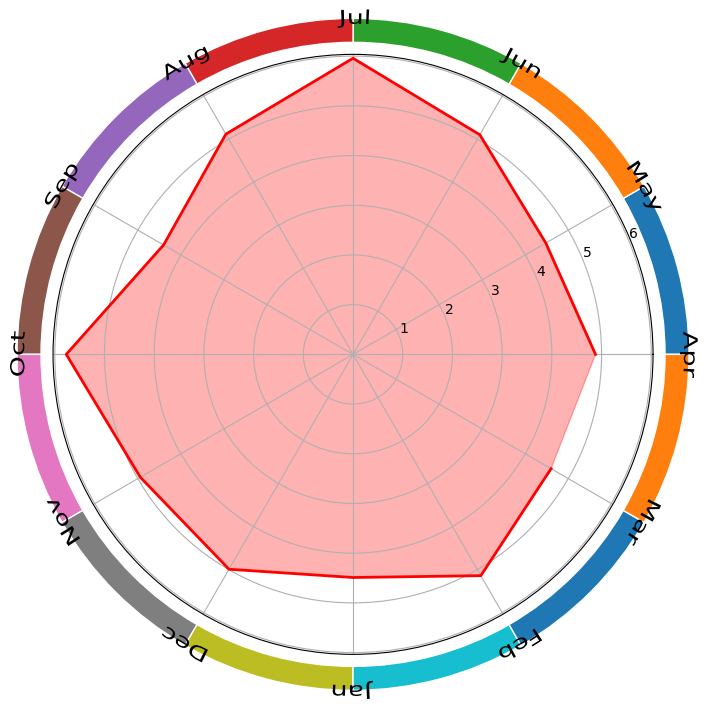

In [215]:


# Data for the polar plot
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
radii = np.random.rand(12) * 2 + 4  # Example radii data

# Create a figure with polar axes
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0., 0., 1, 1], polar=True)

# Plot the data
ax.plot(angles, radii, color="red", lw=2)
ax.fill(angles, radii, color="red", alpha=0.3)

# Set the face color (white)
ax.set_facecolor((1, 1, 1, 0))

# Set limits and ticks
ax.set_xlim(0, 2 * np.pi)
ax.set_xticks(angles)
ax.set_xticklabels([])

# Add custom labels for each spoke
labels = [
    "Apr", "May", "Jun",
    "Jul", "Aug", "Sep",
    "Oct", "Nov", "Dec",
    "Jan", "Feb", "Mar",
]



# Add an outer pie chart
ax2 = fig.add_axes([0., 0., 1, 1], zorder=-1)
ax2.pie(
    np.ones(12),
    radius=1.4,
    colors=None,
    wedgeprops=dict(width=0.1, edgecolor="w"),
)

for i, angle in enumerate(angles):
    label(ax2, labels[i], angle, radius=1.4, scale=0.008)

# Remove tight_layout to avoid ValueError
# fig.tight_layout()

# Show the plot
plt.show()


In [216]:
import matplotlib.transforms as transforms


In [217]:
def label(ax, text, angle, radius=1.3, scale=0.005):
    # 1) Create the text path at (0,0).
    path = TextPath((0, 0), text, size=10)
    
    # 2) Center the text around (0,0) in local coordinates
    V = path.vertices
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()
    V -= [(xmin + xmax) / 2, (ymin + ymax) / 2]
    
    # 3) Build up a transform that:
    #   - scales the text size
    #   - rotates it by angle_degs
    #   - translates it out to the circle
    angle_degs = np.degrees(angle) - 45  # for radial outward orientation
    translate_x = radius * np.cos(angle)
    translate_y = radius * np.sin(angle)
    
    text_transform = (
        transforms.Affine2D()
        .scale(scale)
        .rotate_deg(angle_degs)
        .translate(translate_x, translate_y)
    )
    
    # 4) Apply the transform to the Path
    path = text_transform.transform_path(path)
    
    # 5) Add the path as a patch on the Axes
    patch = PathPatch(
        path,
        facecolor="k",
        linewidth=0,
        clip_on=False,
        zorder=10
    )
    ax.add_patch(patch)

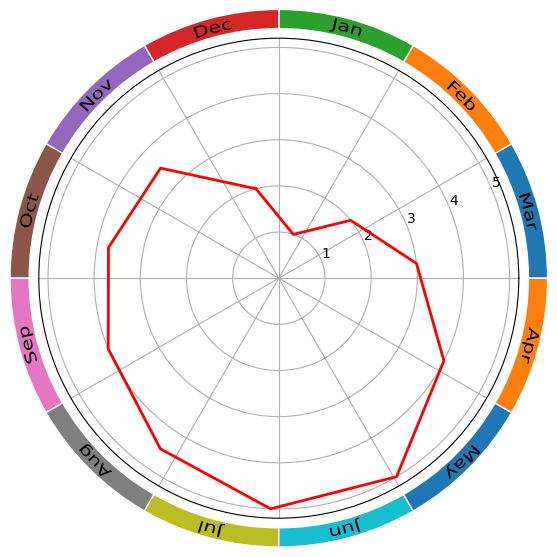

In [219]:
angles = np.linspace(2*np.pi, 0, N, endpoint=True)

# If you want to start plotting from the top (i.e., 12 o'clock),
# shift the angles by pi/2
angles += np.pi/2 + 0.25


# Example radial data (some arbitrary values for demonstration)
radii = [2, 1, 2, 3, 4, 5, 5, 4.5, 4, 3.75, 3.5, 2]

# Create a figure with polar axes
fig = plt.figure()

#ax = fig.add_subplot(111, polar=True)
ax = fig.add_axes([0., 0., 1, 1],polar=True)

# Plot
ax.plot(angles, radii, color="red", lw=2)

# If you want the polygon to "close" visually, repeat the first point
ax.plot([angles[0], angles[0]], [radii[0], radii[0]], color="red")

# Set the face color (white)
ax.set_facecolor((1,1,1,0))

ax.set_xlim(0, 2 * np.pi)
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))

    
ax2 = fig.add_axes([0., 0., 1, 1],zorder=-1)
ax2.pie(np.ones(12),
        radius=1.4,
        colors=None, 
        wedgeprops=dict(width=.1, edgecolor="w"))

def label(ax, text, angle, radius=1, scale=0.005):
    path = TextPath((0, 0), text, size=10)
    path.vertices.flags.writeable = True
    V = path.vertices
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()
    V -= (xmin + xmax) / 2, (ymin + ymax) / 2
    V *= scale
    for i in range(len(V)):
        a = angle - V[i, 0]
        V[i, 0] = (radius + V[i, 1]) * np.cos(a)
        V[i, 1] = (radius + V[i, 1]) * np.sin(a)
    patch = PathPatch(path, facecolor="k", linewidth=0, clip_on=False, zorder=10)
    ax.add_artist(patch)

# Set labels for each spoke
labels = [
    "Apr", "May", "Jun",
    "Jul", "Aug", "Sep",
    "Oct", "Nov", "Dec", 
    "Jan", "Feb", "Mar", # Starts at 3 o'clock (0 )
]

labels = labels[::-1] # Reverse the order of the labels since we start at 3 o'clock

ax.set_xticklabels([])


pairs = [
    (xticks[i], xticks[(i+1) % len(xticks)] + (0 if i+1 < len(xticks) else 2*np.pi))
    for i in range(len(xticks))
]

for i, (a, b) in enumerate(pairs):
    midpoint_angle = (a + b)/2
    label(ax2, labels[i], midpoint_angle, radius=1.35, scale=0.008)

#fig.tight_layout()
plt.show()

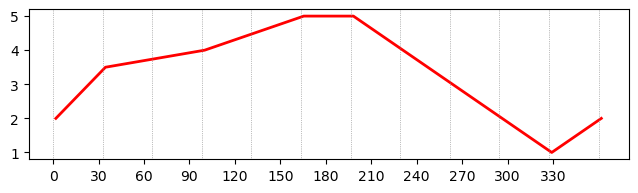

In [237]:
angles = np.linspace(2*np.pi, 0, N, endpoint=True)
angles = np.linspace(360, 0, N, endpoint=True)

# If you want to start plotting from the top (i.e., 12 o'clock),
# shift the angles by pi/2
angles += np.pi/2 + 0.25

# Example radial data (some arbitrary values for demonstration)
radii = [2, 1, 2, 3, 4, 5, 5, 4.5, 4, 3.75, 3.5, 2]

# Create a figure with polar axes
fig = plt.figure(figsize=(6, 1.5))

#ax = fig.add_subplot(111, polar=True)
ax = fig.add_axes([0., 0., 1, 1],polar=False)

# Plot
ax.plot(angles, radii, color="red", lw=2)

# If you want the polygon to "close" visually, repeat the first point
#ax.plot([angles[0], angles[0]], [radii[0], radii[0]], color="red")

ax.set_xticks(np.linspace(0, 360, 12, endpoint=False))

for i in np.linspace(0, 360, 12, endpoint=True):
    ax.axvline(i, color="gray", lw=0.5, ls='dotted')